Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import os
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset=pd.read_csv("ATW Historical Data.csv")
dataset.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,12/30/2022,392.0,393.50,395.00,392.00,72.49K,-0.76%
1,12/29/2022,395.0,392.35,395.00,392.35,35.95K,-0.50%
2,12/28/2022,397.0,392.30,397.00,390.05,2.34K,0.00%
3,12/27/2022,397.0,392.00,398.95,392.00,27.38K,-0.75%
4,12/26/2022,400.0,400.00,400.00,400.00,0.16K,0.00%


In [3]:
trainingset=dataset.iloc[:,2:3].values
print(trainingset)
print(trainingset.shape)

[[393.5 ]
 [392.35]
 [392.3 ]
 ...
 [503.  ]
 [501.1 ]
 [500.  ]]
(1238, 1)


In [4]:
from sklearn.preprocessing import MinMaxScaler

scaler= MinMaxScaler(feature_range= (0,1))
scaled_set=scaler.fit_transform(trainingset)

print(scaled_set)


[[0.37692308]
 [0.37102564]
 [0.37076923]
 ...
 [0.93846154]
 [0.92871795]
 [0.92307692]]


In [14]:

X = []
Y = []

for i in range(60,1238):
    X.append(scaled_set[i-60:i,0])
    Y.append(scaled_set[i,0])

X = np.array(X)
Y = np.array(Y)

print(X)
print(Y.shape)

[[0.37692308 0.37102564 0.37076923 ... 0.53846154 0.51820513 0.52307692]
 [0.37102564 0.37076923 0.36923077 ... 0.51820513 0.52307692 0.49282051]
 [0.37076923 0.36923077 0.41025641 ... 0.52307692 0.49282051 0.49307692]
 ...
 [0.88717949 0.88205128 0.88333333 ... 0.91794872 0.92307692 0.91282051]
 [0.88205128 0.88333333 0.88717949 ... 0.92307692 0.91282051 0.93846154]
 [0.88333333 0.88717949 0.87948718 ... 0.91282051 0.93846154 0.92871795]]
(1178,)


In [15]:
X = np.reshape(X,(X.shape[0],X.shape[1],1))
Y = np.reshape(Y, (Y.shape[0], 1))

print(X.shape)

(1178, 60, 1)


In [16]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Dropout

In [17]:
Re= Sequential()

Re.add(LSTM(units=50 ,return_sequences=True ,input_shape=(X.shape[1],1)))
Re.add(Dropout(0.2))

Re.add(LSTM(units=50 ,return_sequences=True ))
Re.add(Dropout(0.2))

Re.add(LSTM(units=50 ,return_sequences=True ))
Re.add(Dropout(0.2))

Re.add(LSTM(units=50 ))
Re.add(Dropout(0.2))

Re.add(Dense(units=1))

In [66]:
Re.compile(optimizer='adam' ,loss='mean_squared_error')
Re.fit(X,Y, epochs=100 ,batch_size=32)


Epoch 1/100
37/37 [==============================] - 12s 93ms/step - loss: 0.0087
Epoch 2/100
37/37 [==============================] - 4s 109ms/step - loss: 0.0059
Epoch 3/100
37/37 [==============================] - 5s 122ms/step - loss: 0.0057
Epoch 4/100
37/37 [==============================] - 4s 111ms/step - loss: 0.0060
Epoch 5/100
37/37 [==============================] - 4s 113ms/step - loss: 0.0056
Epoch 6/100
37/37 [==============================] - 4s 116ms/step - loss: 0.0057
Epoch 7/100
37/37 [==============================] - 4s 113ms/step - loss: 0.0056
Epoch 8/100
37/37 [==============================] - 4s 110ms/step - loss: 0.0053
Epoch 9/100
37/37 [==============================] - 4s 109ms/step - loss: 0.0057
Epoch 10/100
37/37 [==============================] - 4s 112ms/step - loss: 0.0050
Epoch 11/100
37/37 [==============================] - 4s 113ms/step - loss: 0.0054
Epoch 12/100
37/37 [==============================] - 4s 110ms/step - loss: 0.0054
Epoch 13/100


In [67]:
data_test=pd.read_csv("ATW Historical Data-Jan-2023.csv")
actual_price = data_test.iloc[:,2:3].values
print(actual_price)

[[360. ]
 [360. ]
 [360. ]
 [368. ]
 [365. ]
 [369. ]
 [370. ]
 [370. ]
 [371. ]
 [373. ]
 [375. ]
 [375. ]
 [370. ]
 [365. ]
 [361. ]
 [360. ]
 [365. ]
 [380. ]
 [385. ]
 [385.4]
 [400. ]]


In [68]:
dataset_total = pd.concat((dataset['Open'],data_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total)-len(data_test)-60:].values

inputs = inputs.reshape(-1,1)
inputs = scaler.transform(inputs)

X_test = []
for i in range(60,80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))



In [1]:
Stotck_prediction = Re.predict(X_test)

Stotck_prediction = scaler.inverse_transform(Stotck_prediction)
Stotck_prediction[0,0] =360
Stotck_prediction[1,0] =360

NameError: name 'Re' is not defined

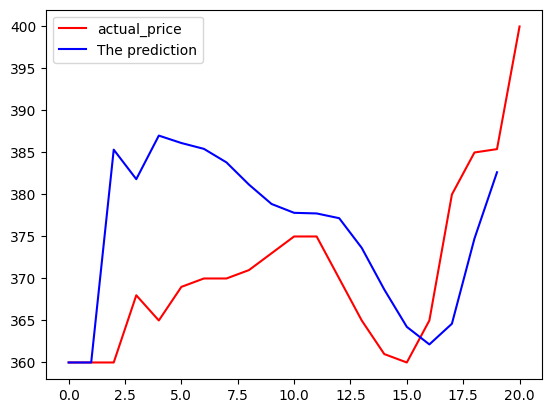

In [ ]:
plt.plot(actual_price , color='red' ,label ='actual_price')
plt.plot(Stotck_prediction, color ='blue' ,label ='The prediction')
plt.legend()